In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import  tqdm
from skimage import morphology, color,feature, io
from skimage.filters.rank import entropy
from skimage.feature import greycomatrix, greycoprops

Text(0.5, 1.0, '4th channel')

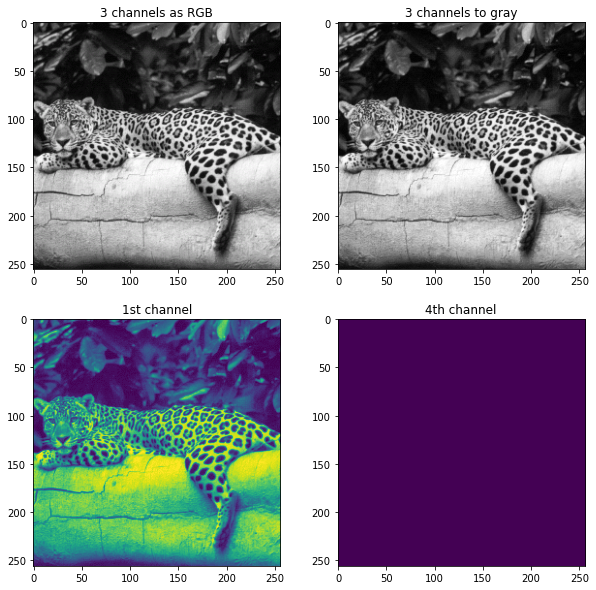

In [4]:
I = io.imread('jaguar.gif')

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(I[...,0:3])
plt.title('3 channels as RGB')
plt.subplot(222)
I_gray=(color.rgb2gray(I[...,0:3])*255).astype(np.uint8)
plt.title('3 channels to gray')
plt.imshow(I_gray,cmap='gray')
plt.subplot(223)
plt.imshow(I[...,0])
plt.title('1st channel')

plt.subplot(224)
plt.imshow(I[...,3])
plt.title('4th channel')

Text(0.5, 1.0, 'Entropia')

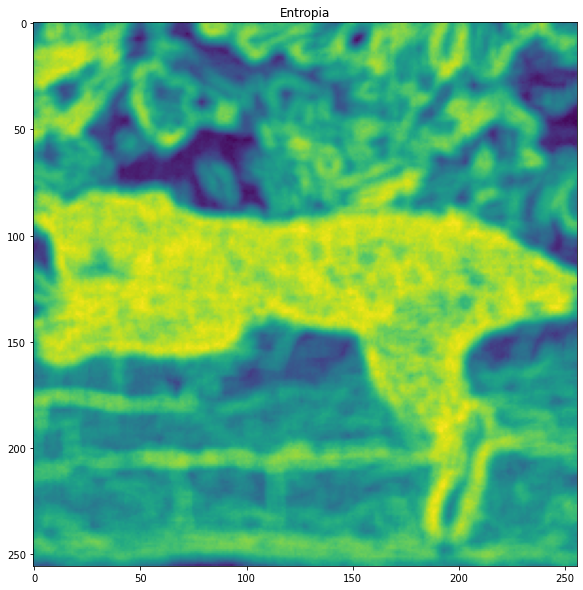

In [5]:
im_entropy = entropy(I_gray,morphology.disk(5))
plt.figure(figsize=(10,10))
plt.imshow(im_entropy)
plt.title('Entropia')

In [6]:
im_contrast = np.zeros(im_entropy.shape)
im_correlation = np.zeros(im_entropy.shape)
im_energy = np.zeros(im_entropy.shape)
im_homogeneity = np.zeros(im_entropy.shape)

In [7]:
distances = [1]
angles = [0]
properties= ['contrast','correlation','energy','homogeneity']
window_size = 9
for i in tqdm(range(0,im_entropy.shape[0]-window_size)):
    for j in range(0,im_entropy.shape[0]-window_size):
        glcm = greycomatrix(I_gray[i:i+window_size,j:j+window_size],
                            distances=distances,
                            angles=angles,
                            symmetric=True,
                            normed=True)
        feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
        im_contrast[i,j] = feats[0]
        im_correlation[i,j] = feats[1]
        im_energy[i,j] = feats[2]
        im_homogeneity[i,j] = feats[3]

Text(0.5, 1.0, 'Homogeinity')

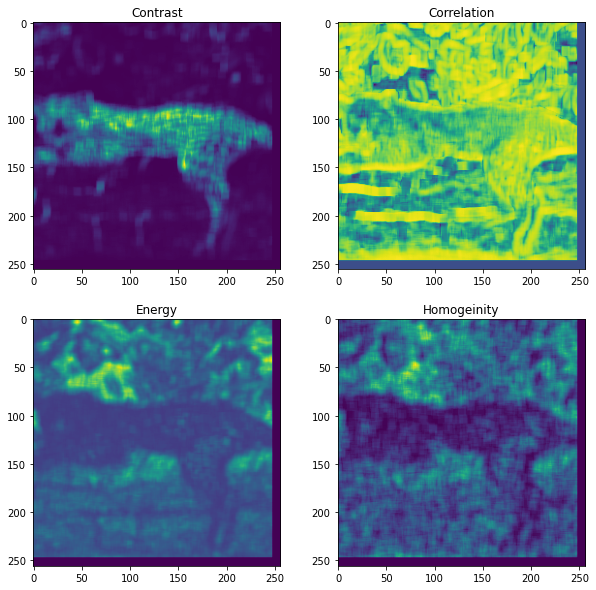

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(im_contrast)
plt.title('Contrast')

plt.subplot(222)
plt.imshow(im_correlation)
plt.title('Correlation')

plt.subplot(223)
plt.imshow(im_energy)
plt.title('Energy')

plt.subplot(224)
plt.imshow(im_homogeneity)
plt.title('Homogeinity')

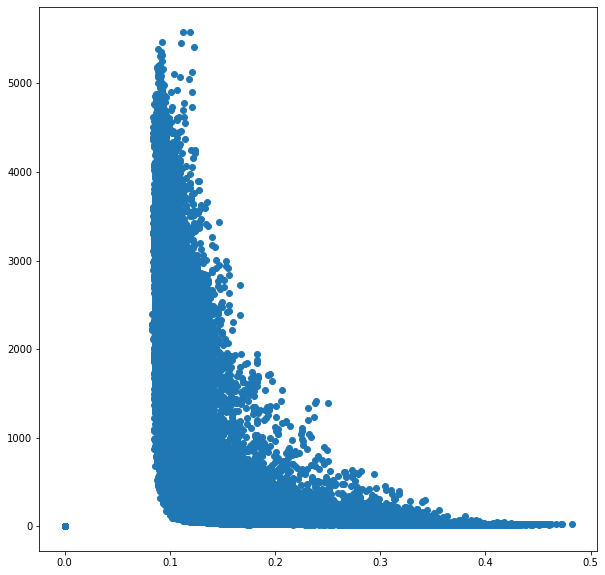

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(im_energy.ravel(),im_contrast.ravel())

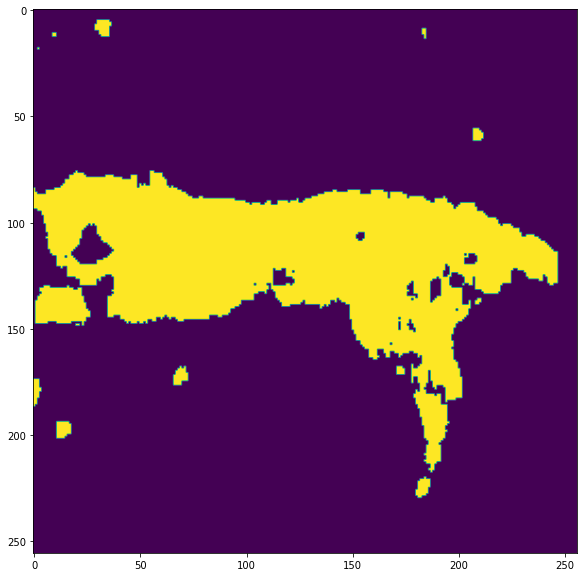

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(np.logical_and(im_energy<0.15,im_contrast>1000))

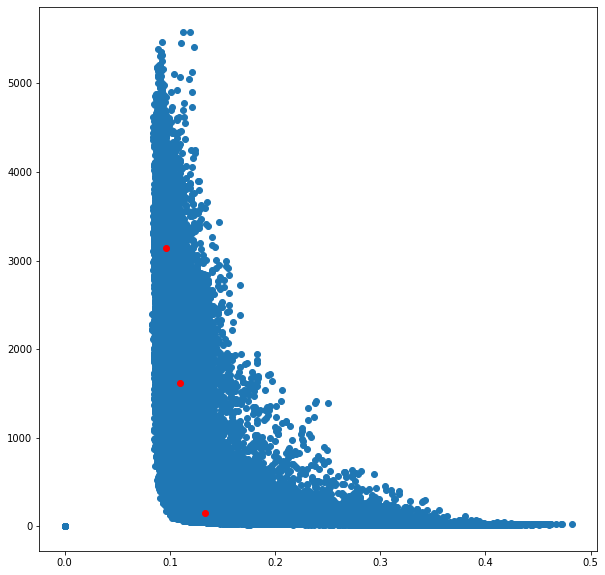

In [18]:
# podla ucebnice

X=np.array([im_energy.ravel(),im_contrast.ravel()])
X=X.transpose()
np.random.shuffle(X)

n_iter = 5 # Počet iterácií algoritmu
n_centers = 3 # Počet zhlukov, ktoré chceme identifikovať
alfa = 0.05

cidx=np.random.randint(X.shape[0],size=n_centers)
centers=X[cidx]

for i in range(n_iter):
    for item in X:
        dist=[]
        for center in centers:
            dist.append(np.sum((item-center)**2))
        dist=np.array(dist)
        index = np.argmin(dist)
        centers[index] = (item - centers[index]) * alfa + centers[index]


plt.figure(figsize=(10,10))
plt.scatter(X.transpose()[0],X.transpose()[1])
plt.scatter(centers.transpose()[0],centers.transpose()[1],color='r')

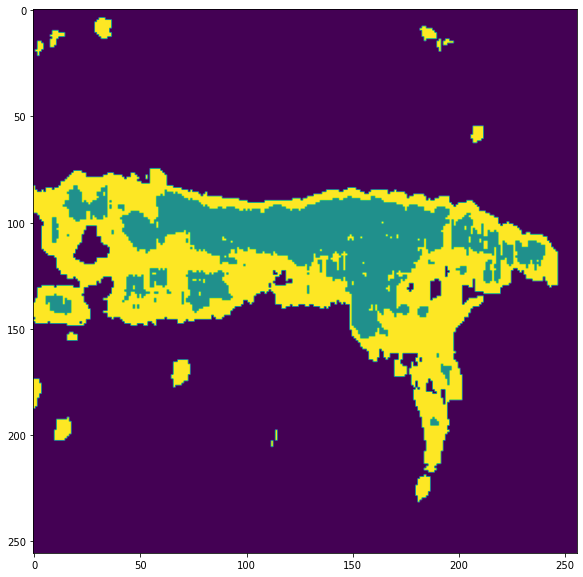

In [19]:
new_im=np.zeros(im_contrast.shape)

for r in range(im_contrast.shape[0]):
    for c in range(im_contrast.shape[1]):
        item=np.array([im_energy[r,c],im_contrast[r,c]])
        dist=[]
        for center in centers:
            dist.append(np.sum((item-center)**2))
        dist=np.array(dist)
        val = np.argmin(dist)
        new_im[r,c]=val



plt.figure(figsize=(10,10))
plt.imshow(new_im)

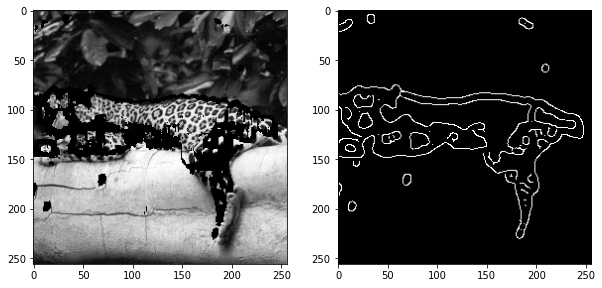

In [20]:
rr,cc=np.where(new_im>1)
I_seg=I_gray.copy()
I_seg[rr,cc]=0
image=feature.canny(new_im>1, 3)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(I_seg,cmap='gray')
plt.subplot(122)
plt.imshow(image, cmap = "gray")